In [41]:
import statsmodels.api as sm

In [45]:
# Longley datasets Time Series
data = sm.datasets.longley.load()
data.exog = sm.add_constant(data.exog, prepend=False)

In [58]:
ols_resid = sm.OLS(data.endog.values, data.exog.values).fit().resid

In [59]:
ols_resid

array([ 267.34002975,  -94.0139424 ,   46.28716775, -410.11462194,
        309.71459075, -249.31121534, -164.0489564 ,  -13.18035687,
         14.30477259,  455.39409455,  -17.26892712,  -39.05504253,
       -155.5499736 ,  -85.67130805,  341.93151395, -206.7578252 ])

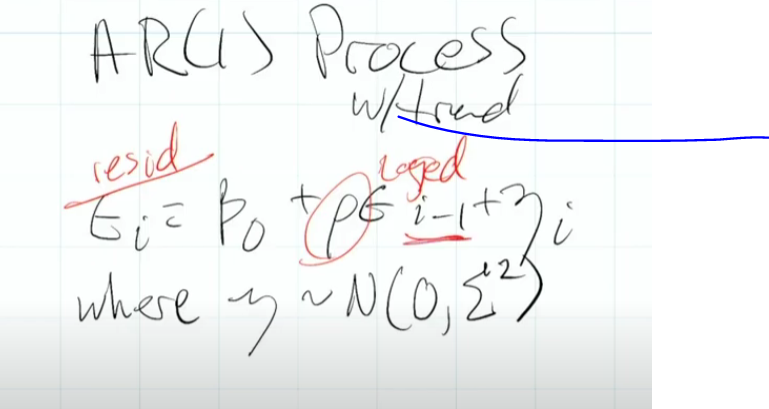

In [60]:
resid_fit = sm.OLS(ols_resid[1:], sm.add_constant(ols_resid[:-1])).fit()

In [61]:
resid_fit.tvalues[1]

-1.4390229839747055

In [62]:
resid_fit.pvalues[1]

0.17378444788783487

In [64]:
rho = resid_fit.params[1]

In [65]:
rho

-0.3634294908772448

In [66]:
from scipy.linalg import toeplitz
toeplitz(range(5))

array([[0, 1, 2, 3, 4],
       [1, 0, 1, 2, 3],
       [2, 1, 0, 1, 2],
       [3, 2, 1, 0, 1],
       [4, 3, 2, 1, 0]])

In [67]:
order = toeplitz(range(len(ols_resid)))

In [68]:
order

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [ 1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       [ 2,  1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 3,  2,  1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 4,  3,  2,  1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 5,  4,  3,  2,  1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 6,  5,  4,  3,  2,  1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 7,  6,  5,  4,  3,  2,  1,  0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 8,  7,  6,  5,  4,  3,  2,  1,  0,  1,  2,  3,  4,  5,  6,  7],
       [ 9,  8,  7,  6,  5,  4,  3,  2,  1,  0,  1,  2,  3,  4,  5,  6],
       [10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0,  1,  2,  3,  4,  5],
       [11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0,  1,  2,  3,  4],
       [12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0,  1,  2,  3],
       [13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,

In [70]:
sigma = rho**order
gls_model = sm.GLS(data.endog, data.exog, sigma=sigma)

In [71]:
gls_results = gls_model.fit()

In [72]:
gls_results.summary()

C:\Users\alexandra.chirita98\Anaconda3\envs\da_work\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:                 TOTEMP   R-squared:                       0.998
Model:                            GLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     724.0
Date:                Mon, 23 May 2022   Prob (F-statistic):           1.48e-11
Time:                        16:38:35   Log-Likelihood:                -107.50
No. Observations:                  16   AIC:                             229.0
Df Residuals:                       9   BIC:                             234.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GNPDEFL      -12.7656     69.431     -0.184      0.858    -169.829     144.298
GNP           -0.0380      0.026     -1.448      0.182      -0.097       0.021
UNEMP         -2.1869      0.382     -5.719      0.000      -3.052      -1.322
ARMED         -1.1518      0.165     -6.970      0.000      -1.526      -0.778
POP           -0.0681      0.176     -0.386      0.709      -0.467       0.331
YEAR        1993.9529    342.635      5.819      0.000    1218.860    2769.046
const      -3.798e+06   6.71e+05     -5.663      0.000   -5.32e+06   -2.28e+06
==============================================================================
Omnibus:                        1.365   Durbin-Watson:                   2.534
Prob(Omnibus):                  0.505   Jarque-Bera (JB):                0.885
Skew:                           0.209   Prob(JB):                        0.642
Kurtosis:                       1.926   Cond. No.                     5.61e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.61e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
glsar_model = sm.GLSAR(data.endog, data.exog, 1)
glsar_results  = glsar_model.iterative_fit(1)
glsar_results.summary()

C:\Users\alexandra.chirita98\Anaconda3\envs\da_work\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           GLSAR Regression Results                           
==============================================================================
Dep. Variable:                 TOTEMP   R-squared:                       0.996
Model:                          GLSAR   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     295.2
Date:                Mon, 23 May 2022   Prob (F-statistic):           6.09e-09
Time:                        16:40:56   Log-Likelihood:                -102.04
No. Observations:                  15   AIC:                             218.1
Df Residuals:                       8   BIC:                             223.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GNPDEFL       34.5568     84.734      0.408      0.694    -160.840     229.953
GNP           -0.0343      0.033     -1.047      0.326      -0.110       0.041
UNEMP         -1.9621      0.481     -4.083      0.004      -3.070      -0.854
ARMED         -1.0020      0.211     -4.740      0.001      -1.489      -0.515
POP           -0.0978      0.225     -0.435      0.675      -0.616       0.421
YEAR        1823.1829    445.829      4.089      0.003     795.100    2851.266
const      -3.468e+06   8.72e+05     -3.979      0.004   -5.48e+06   -1.46e+06
==============================================================================
Omnibus:                        1.960   Durbin-Watson:                   2.554
Prob(Omnibus):                  0.375   Jarque-Bera (JB):                1.423
Skew:                           0.713   Prob(JB):                        0.491
Kurtosis:                       2.508   Cond. No.                     4.80e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.8e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
gls_results.params

GNPDEFL   -1.276565e+01
GNP       -3.800132e-02
UNEMP     -2.186949e+00
ARMED     -1.151776e+00
POP       -6.805356e-02
YEAR       1.993953e+03
const     -3.797855e+06
dtype: float64

In [75]:
glsar_results.params

GNPDEFL    3.455678e+01
GNP       -3.434101e-02
UNEMP     -1.962144e+00
ARMED     -1.001973e+00
POP       -9.780460e-02
YEAR       1.823183e+03
const     -3.467961e+06
dtype: float64

In [76]:
gls_results.bse

GNPDEFL        69.430807
GNP             0.026248
UNEMP           0.382393
ARMED           0.165253
POP             0.176428
YEAR          342.634628
const      670688.699309
dtype: float64

In [77]:
glsar_results.bse

GNPDEFL        84.733715
GNP             0.032803
UNEMP           0.480545
ARMED           0.211384
POP             0.224774
YEAR          445.828748
const      871584.051696
dtype: float64